In [101]:
import pandas as pd
import numpy as np
import os
import shutil
import statistics
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import movieslib as mov

import importlib
importlib.reload(movieslib)

<module 'movieslib' from '/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py'>

In [73]:
FOLDER_INPUT = './12movies_output/'
FOLDER_OUTPUT = './extr_stat'

df = pd.read_csv("./12movies_output/suitable_frames_QuantumOfSolaceHM.csv", delimiter=',')
start = 0
df[start:start+10]

,Unnamed: 0,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,65,0,2.669,0.98,1,0.123849,-0.350482,-0.928344,-0.024855,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,66,0,2.711,0.98,1,0.112172,-0.351786,-0.929335,-0.036631,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,67,0,2.753,0.98,1,0.098747,-0.343626,-0.933901,-0.048941,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,68,0,2.794,0.98,1,0.088927,-0.338946,-0.936594,-0.057072,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,69,0,2.836,0.98,1,0.079353,-0.336153,-0.938458,-0.065853,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,5,70,0,2.878,0.98,1,0.073267,-0.332319,-0.940317,-0.070743,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,6,71,0,2.920,0.88,1,0.071229,-0.322234,-0.943977,-0.071626,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,7,72,0,2.961,0.98,1,0.072823,-0.311551,-0.947435,-0.069617,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,8,73,0,3.003,0.98,1,0.072376,-0.307328,-0.948847,-0.070172,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,9,74,0,3.045,0.98,1,0.068649,-0.301880,-0.950871,-0.074087,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [74]:
filenames = mov.get_filenames(FOLDER_INPUT)

In [75]:
colSets = {'eyes':['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r'], 'mouth':['AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r'], 'blink':['AU45_r']}
#we naad to compare the results with blink and without blink
#I hypotesize that AU45_r is noisy

In [ ]:
#Sequence of the actions
# 
# 0. upload datasets
# 1. Separate 'keira knightley' shoots 
#2. Filter the data (AU_r columns)
#3. Calculate stats: -for each line; for each frame
# Output:  a dataframe with mean values of extracted features for each frame in each video
            #-the dataframes of all videos with extracted features for each line
            #a dataframe with average for the whole video (later)

In [102]:
#split_cuts

OUTPUT = './12movies_cuts' #create a new folder (rewrite!)
mov.new_folder(OUTPUT)
cuts_logs = {} #dictionary: movie name + logs on cuts in this movie
#columns to be included
cols = ['frame', 'face_id', 'timestamp', 'AU01_r',
       'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r',
       'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r',
       'AU26_r', 'AU45_r']

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')

    df_split, cuts = mov.cuts_split(df)
    cuts_logs[name] = cuts

    pd.DataFrame.from_dict(df_split[cols]).to_csv(f'./{OUTPUT}/{name}.csv', sep=',', mode='w')


#save logs
logs = {}
for i in cuts_logs:
    logs[i] = [len(cuts_logs[i])]
print(logs)
pd.DataFrame.from_dict(logs).to_csv(f'./{OUTPUT}/logs.csv', sep=',', mode='w')

with open(f'./{OUTPUT}/logs_expanded.txt', 'w') as file:
    for i in cuts_logs:
        file.write(i + ' ' + str(cuts_logs[i]) + '\n')


Prosess file SpiderAM ...
ok reading csv...
The face_id that is changed: 5 [[12077.0, 12188.0, 4.625], [12190.0, 12275.0, 3.541999999999973]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 53 [[40641.0, 41026.0, 16.041999999999916], [41028.0, 41230.0, 8.416999999999916], [41232.0, 41306.0, 3.0839999999998327]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 64 [[42985.0, 43089.0, 4.333000000000084], [43092.0, 43165.0, 3.0419999999999163]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 96 [[59273.0, 59346.0, 3.0410000000001673], [59457.0, 59617.0, 6.666999999999916]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 144 [[83065.0, 83144.0, 3.2919999999999163], [83149.0, 83264.0, 4.791999999999916]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 159 [[94810.0, 94887.0, 3.2080000000000837], [94889.0, 94996.0, 4.458000000000084]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 180 [[112077.0, 112231.0, 6.417000000000371], [112233.0, 112328.0, 3.959000000000742]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 208 [[128689.0, 128766.0, 3.207999999999629], [128841.0, 128915.0, 3.084000000000742]] 2
The amount of shots with cuts: 8


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


Prosess file CleanAM ...
ok reading csv...
The face_id that is changed: 28 [[30362.0, 30519.0, 6.279999999999973], [30641.0, 30768.0, 5.080000000000155]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 38 [[36697.0, 36879.0, 7.279999999999973], [36893.0, 37018.0, 5.0]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 91 [[66505.0, 66750.0, 9.800000000000182], [66753.0, 66987.0, 9.360000000000127], [66990.0, 67084.0, 3.7600000000002183]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 158 [[106742.0, 106857.0, 4.599999999999454], [106861.0, 106977.0, 4.640000000000327]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 176 [[114591.0, 114711.0, 4.799999999999272], [114713.0, 114852.0, 5.5600000000004]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 184 [[120193.0, 120381.0, 7.519999999999527], [120389.0, 120519.0, 5.199999999999818], [120521.0, 120595.0, 2.9600000000000364]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The face_id that is changed: 207 [[130177.0, 130343.0, 6.640000000000327], [130345.0, 130487.0, 5.6799999999993815]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 215 [[137514.0, 137778.0, 10.55999999999949], [137780.0, 137867.0, 3.480000000000473]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 223 [[147233.0, 147335.0, 4.079999999999927], [147353.0, 147463.0, 4.399999999999636]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 246 [[156647.0, 156760.0, 4.519999999999527], [156766.0, 156904.0, 5.519999999999527]] 2
The amount of shots with cuts: 10


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


Prosess file ClickHM ...
ok reading csv...
The face_id that is changed: 24 [[15729.0, 15802.0, 3.044999999999959], [15808.0, 15894.0, 3.586999999999989]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 160 [[76041.0, 76209.0, 7.007000000000062], [76213.0, 76366.0, 6.380999999999858]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 190 [[90292.0, 90406.0, 4.755000000000109], [90410.0, 90486.0, 3.1700000000000728]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 235 [[113089.0, 113209.0, 5.005000000000109], [113282.0, 113454.0, 7.173999999999978]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 314 [[139481.0, 139560.0, 3.2950000000000728], [139565.0, 139771.0, 8.591999999999643]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 5
Prosess file AllOrNothingAM ...
ok reading csv...
The face_id that is changed: 22 [[14676.0, 15375.0, 27.960000000000036], [15377.0, 15639.0, 10.480000000000018]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 34 [[21218.0, 21336.0, 4.720000000000027], [21338.0, 21671.0, 13.319999999999936]] 2
The face_id that is changed: 35 [[21284.0, 21489.0, 8.199999999999932], [21494.0, 21763.0, 10.759999999999991]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 87 [[50483.0, 50583.0, 4.0], [50587.0, 50739.0, 6.079999999999927]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 98 [[53097.0, 53198.0, 4.039999999999964], [53239.0, 53366.0, 5.079999999999927]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 118 [[59278.0, 59499.0, 8.840000000000146], [59501.0, 59695.0, 7.760000000000218]] 2
The face_id that is changed: 119 [[59958.0, 60062.0, 4.1599999999998545], [60064.0, 60186.0, 4.880000000000109]] 2
The face_id that is changed: 120 [[60369.0, 60613.0, 9.760000000000218], [60615.0, 60715.0, 4.0]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

The face_id that is changed: 153 [[70734.0, 71013.0, 11.159999999999854], [71027.0, 71384.0, 14.2800000000002]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 163 [[74617.0, 74998.0, 15.240000000000236], [75060.0, 75162.0, 4.079999999999927]] 2
The face_id that is changed: 164 [[74609.0, 75068.0, 18.359999999999673], [75070.0, 75303.0, 9.319999999999709]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 165 [[74609.0, 75019.0, 16.399999999999636], [75021.0, 75303.0, 11.279999999999745]] 2
The face_id that is changed: 166 [[74793.0, 74912.0, 4.760000000000218], [74914.0, 75303.0, 15.559999999999945]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 221 [[102313.0, 102473.0, 6.400000000000091], [102478.0, 102556.0, 3.119999999999891]] 2
The face_id that is changed: 222 [[102561.0, 102730.0, 6.760000000000218], [102785.0, 102983.0, 7.920000000000073]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 225 [[103257.0, 103623.0, 14.640000000000327], [103628.0, 103844.0, 8.640000000000327]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 232 [[108025.0, 108214.0, 7.5600000000004], [108242.0, 108340.0, 3.9200000000000728]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 238 [[109635.0, 110394.0, 30.360000000000582], [110420.0, 110741.0, 12.840000000000146]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 243 [[111761.0, 112628.0, 34.68000000000029], [112630.0, 112765.0, 5.400000000000546]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 250 [[115570.0, 115693.0, 4.920000000000073], [115827.0, 116020.0, 7.720000000000255]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 256 [[119988.0, 120307.0, 12.760000000000218], [120309.0, 120421.0, 4.480000000000473]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 298 [[137634.0, 137776.0, 5.680000000000291], [137958.0, 138037.0, 3.1599999999998545], [138039.0, 138143.0, 4.1599999999998545]] 3
The face_id that is changed: 299 [[138307.0, 138526.0, 8.760000000000218], [138528.0, 138607.0, 3.1599999999998545], [138624.0, 138740.0, 4.640000000000327], [138790.0, 139142.0, 14.079999999999927]] 4


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 304 [[139566.0, 139851.0, 11.399999999999636], [139860.0, 140374.0, 20.5600000000004]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 326 [[147425.0, 147580.0, 6.199999999999818], [147605.0, 147685.0, 3.199999999999818]] 2
The face_id that is changed: 330 [[148465.0, 148559.0, 3.759999999999309], [148566.0, 148870.0, 12.159999999999854]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 334 [[149089.0, 149213.0, 4.959999999999127], [149215.0, 149394.0, 7.1599999999998545]] 2
The face_id that is changed: 335 [[149472.0, 149640.0, 6.720000000000255], [149658.0, 149822.0, 6.5600000000004], [149824.0, 149976.0, 6.079999999999927]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 356 [[157553.0, 157652.0, 3.9600000000000364], [157654.0, 157744.0, 3.600000000000364]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 363 [[160698.0, 160858.0, 6.399999999999636], [161081.0, 161338.0, 10.279999999999745]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 382 [[166977.0, 167084.0, 4.279999999999745], [167201.0, 167344.0, 5.720000000000255], [167561.0, 167759.0, 7.920000000000073]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 406 [[176782.0, 177074.0, 11.680000000000291], [177212.0, 177348.0, 5.440000000000509]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 32
Prosess file CertifiedCopyAM ...
ok reading csv...
The face_id that is changed: 2 [[4625.0, 5006.0, 15.23999999999998], [5008.0, 5097.0, 3.5600000000000023]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 29 [[11513.0, 11670.0, 6.279999999999973], [11672.0, 11806.0, 5.360000000000014]] 2
The face_id that is changed: 32 [[12097.0, 12200.0, 4.1200000000000045], [12218.0, 12406.0, 7.519999999999982]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 44 [[16657.0, 16770.0, 4.519999999999982], [16786.0, 16889.0, 4.1200000000000045]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 60 [[20891.0, 21166.0, 11.0], [21168.0, 21345.0, 7.080000000000041]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 97 [[35801.0, 35934.0, 5.319999999999936], [35945.0, 36215.0, 10.799999999999955]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 102 [[37718.0, 38117.0, 15.960000000000036], [38120.0, 38390.0, 10.799999999999955]] 2
The face_id that is changed: 105 [[39057.0, 39157.0, 4.0], [39243.0, 39475.0, 9.279999999999973]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 110 [[41007.0, 41116.0, 4.3599999999999], [41122.0, 41236.0, 4.560000000000173]] 2
The face_id that is changed: 111 [[41545.0, 41721.0, 7.039999999999964], [41723.0, 41880.0, 6.279999999999973]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 114 [[43379.0, 43484.0, 4.2000000000000455], [43497.0, 43587.0, 3.6000000000001364]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 120 [[44785.0, 44879.0, 3.759999999999991], [44909.0, 45008.0, 3.9600000000000364], [45010.0, 45167.0, 6.2800000000002]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 130 [[52546.0, 52635.0, 3.5599999999999454], [52660.0, 52784.0, 4.960000000000036]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 134 [[52801.0, 53110.0, 12.360000000000127], [53112.0, 53299.0, 7.480000000000018]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 143 [[55900.0, 56622.0, 28.88000000000011], [56668.0, 57688.0, 40.80000000000018]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 163 [[65377.0, 66043.0, 26.639999999999873], [66046.0, 66312.0, 10.639999999999873]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 168 [[67233.0, 67358.0, 5.0], [67371.0, 67820.0, 17.960000000000036]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 171 [[68777.0, 69542.0, 30.59999999999991], [69544.0, 69991.0, 17.88000000000011]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 173 [[70569.0, 70922.0, 14.120000000000346], [70926.0, 71027.0, 4.039999999999964]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 182 [[73854.0, 73988.0, 5.360000000000127], [74000.0, 74164.0, 6.559999999999945], [74166.0, 74429.0, 10.519999999999982], [74441.0, 74543.0, 4.079999999999927]] 4


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 198 [[79170.0, 79311.0, 5.639999999999873], [79313.0, 79452.0, 5.559999999999945]] 2
The face_id that is changed: 199 [[79457.0, 79638.0, 7.2400000000002365], [79640.0, 79790.0, 6.0]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 201 [[80169.0, 80285.0, 4.640000000000327], [80288.0, 80511.0, 8.920000000000073]] 2
The face_id that is changed: 202 [[80513.0, 80685.0, 6.880000000000109], [80687.0, 81005.0, 12.7199999999998], [81007.0, 81117.0, 4.400000000000091]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 215 [[85441.0, 85556.0, 4.599999999999909], [85559.0, 85643.0, 3.3599999999996726]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 218 [[85729.0, 86127.0, 15.920000000000073], [86184.0, 86357.0, 6.919999999999618], [86377.0, 86453.0, 3.0399999999999636]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 234 [[91665.0, 92347.0, 27.2800000000002], [92378.0, 92984.0, 24.240000000000236]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 243 [[94002.0, 94179.0, 7.079999999999927], [94181.0, 94769.0, 23.519999999999982]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 263 [[101265.0, 102268.0, 40.11999999999989], [102270.0, 102361.0, 3.6399999999998727]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 270 [[106703.0, 106812.0, 4.359999999999673], [106822.0, 106958.0, 5.4399999999996]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 274 [[107217.0, 107348.0, 5.239999999999782], [107353.0, 107481.0, 5.119999999999891]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 283 [[109120.0, 109224.0, 4.1599999999998545], [109226.0, 109318.0, 3.680000000000291]] 2
The face_id that is changed: 286 [[109630.0, 109708.0, 3.119999999999891], [109710.0, 109804.0, 3.7600000000002183]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 295 [[112657.0, 112776.0, 4.760000000000218], [112779.0, 112874.0, 3.800000000000182]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 298 [[113673.0, 114014.0, 13.640000000000327], [114016.0, 114190.0, 6.960000000000036]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 301 [[115145.0, 115367.0, 8.88000000000011], [115371.0, 115465.0, 3.7600000000002183], [115469.0, 115925.0, 18.23999999999978], [115927.0, 116021.0, 3.7600000000002183], [116024.0, 116128.0, 4.1599999999998545]] 5
The face_id that is changed: 303 [[116345.0, 116520.0, 7.0], [116529.0, 116712.0, 7.319999999999709]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 305 [[117321.0, 117560.0, 9.55999999999949], [117562.0, 117754.0, 7.680000000000291]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 310 [[118593.0, 118995.0, 16.079999999999927], [118998.0, 119127.0, 5.1599999999998545]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 312 [[119788.0, 120446.0, 26.32000000000062], [120451.0, 120633.0, 7.279999999999745]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 319 [[122585.0, 122748.0, 6.520000000000437], [122750.0, 123160.0, 16.399999999999636], [123162.0, 123408.0, 9.840000000000146], [123410.0, 123577.0, 6.680000000000291]] 4


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 320 [[123929.0, 124145.0, 8.640000000000327], [124151.0, 124558.0, 16.279999999999745], [124561.0, 124918.0, 14.280000000000655]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 323 [[125499.0, 126047.0, 21.920000000000073], [126057.0, 126244.0, 7.480000000000473], [126247.0, 127295.0, 41.92000000000007], [127299.0, 128066.0, 30.68000000000029]] 4


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 324 [[128070.0, 128565.0, 19.800000000000182], [128567.0, 128936.0, 14.759999999999309]] 2
The face_id that is changed: 325 [[128945.0, 129236.0, 11.639999999999418], [129242.0, 129337.0, 3.7999999999992724]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 326 [[129369.0, 129627.0, 10.319999999999709], [129633.0, 129988.0, 14.199999999999818]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 334 [[134681.0, 134762.0, 3.2399999999997817], [134842.0, 135124.0, 11.279999999999745]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 341 [[137649.0, 137951.0, 12.079999999999927], [137953.0, 138539.0, 23.44000000000051]] 2
The face_id that is changed: 342 [[138633.0, 138915.0, 11.280000000000655], [138920.0, 139028.0, 4.319999999999709]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 343 [[139243.0, 139330.0, 3.4799999999995634], [139334.0, 139720.0, 15.44000000000051]] 2
The face_id that is changed: 344 [[139145.0, 139548.0, 16.11999999999989], [139550.0, 139714.0, 6.5600000000004]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 51
Prosess file FastAndFuriousHM ...
ok reading csv...
The face_id that is changed: 3 [[12843.0, 12924.0, 3.377999999999929], [12948.0, 13059.0, 4.6299999999999955]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 23 [[23745.0, 23832.0, 3.6280000000000427], [23835.0, 23913.0, 3.254000000000019]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 95 [[75378.0, 75617.0, 9.968000000000302], [75622.0, 75694.0, 3.0030000000001564]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 162 [[123940.0, 124184.0, 10.17699999999968], [124186.0, 124273.0, 3.6279999999997017]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 4
Prosess file BrightStarAM ...
ok reading csv...
The face_id that is changed: 17 [[14686.0, 14835.0, 6.215000000000032], [14861.0, 15043.0, 7.591000000000008]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 74 [[45186.0, 45257.0, 2.9610000000000127], [45259.0, 45340.0, 3.3780000000001564]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 114 [[70978.0, 71120.0, 5.9229999999997744], [71123.0, 71222.0, 4.12900000000036]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 136 [[82707.0, 82812.0, 4.378999999999905], [82946.0, 83038.0, 3.836999999999989]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 163 [[103297.0, 104195.0, 37.45399999999972], [104198.0, 104273.0, 3.1279999999997017], [104275.0, 104560.0, 11.886999999999716]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 258 [[155129.0, 155212.0, 3.462000000000444], [155254.0, 155382.0, 5.338999999999942]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 263 [[161204.0, 161850.0, 26.943999999999505], [161853.0, 161946.0, 3.8789999999999054]] 2
The face_id that is changed: 264 [[162032.0, 162106.0, 3.08600000000024], [162115.0, 162330.0, 8.967000000000553], [162332.0, 162560.0, 9.510000000000218], [162589.0, 162684.0, 3.962999999999738]] 4


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 8
Prosess file SynecdocheAM ...
ok reading csv...
The face_id that is changed: 35 [[19929.0, 20168.0, 9.559999999999945], [20170.0, 20295.0, 5.0]] 2
The face_id that is changed: 38 [[20897.0, 21115.0, 8.719999999999914], [21123.0, 21203.0, 3.2000000000000455]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 47 [[26658.0, 26802.0, 5.759999999999991], [26804.0, 27119.0, 12.600000000000136]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 90 [[43657.0, 43822.0, 6.599999999999909], [43830.0, 44001.0, 6.839999999999918]] 2
The face_id that is changed: 91 [[43684.0, 43822.0, 5.519999999999982], [43830.0, 44001.0, 6.839999999999918]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 110 [[51520.0, 51607.0, 3.4799999999995634], [51616.0, 51725.0, 4.360000000000127]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 200 [[73105.0, 73432.0, 13.079999999999927], [73513.0, 73760.0, 9.88000000000011], [73762.0, 73903.0, 5.639999999999873]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 230 [[88977.0, 89065.0, 3.519999999999982], [89145.0, 89221.0, 3.0399999999999636]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 261 [[98697.0, 98807.0, 4.399999999999636], [98816.0, 98896.0, 3.200000000000273]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 277 [[102829.0, 103327.0, 19.920000000000073], [103457.0, 103703.0, 9.840000000000146], [103705.0, 103895.0, 7.600000000000364]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 335 [[136545.0, 136635.0, 3.5999999999994543], [136637.0, 136822.0, 7.400000000000546]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 339 [[137545.0, 137657.0, 4.479999999999563], [137659.0, 137813.0, 6.1599999999998545]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 349 [[143729.0, 143879.0, 6.0], [143889.0, 143983.0, 3.759999999999309]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 384 [[154602.0, 154703.0, 4.039999999999964], [154714.0, 155290.0, 23.039999999999964]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 429 [[168793.0, 168917.0, 4.960000000000036], [169025.0, 169276.0, 10.039999999999964]] 2
The face_id that is changed: 434 [[171337.0, 171427.0, 3.600000000000364], [171497.0, 171583.0, 3.4399999999996]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 445 [[178498.0, 178585.0, 3.4799999999995634], [178596.0, 178785.0, 7.559999999999491]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 447 [[179017.0, 179177.0, 6.399999999999636], [179209.0, 180364.0, 46.20000000000073]] 2
The amount of shots with cuts: 18


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


Prosess file MonsterInLawHM ...
ok reading csv...
The face_id that is changed: 134 [[67161.0, 67248.0, 3.480000000000018], [67297.0, 67371.0, 2.9600000000000364]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The face_id that is changed: 177 [[85449.0, 85634.0, 7.400000000000091], [85697.0, 85782.0, 3.399999999999636]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 196 [[94225.0, 94322.0, 3.880000000000109], [94325.0, 94468.0, 5.7199999999998]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 203 [[98284.0, 98379.0, 3.799999999999727], [98527.0, 98622.0, 3.800000000000182]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 266 [[129955.0, 130053.0, 3.9200000000000728], [130088.0, 130185.0, 3.880000000000109]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 5
Prosess file PiratesOfCaribbeanHM ...
ok reading csv...
The face_id that is changed: 0 [[2130.0, 2275.0, 6.048000000000002], [2505.0, 2579.0, 3.0859999999999985]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 90 [[63223.0, 63321.0, 4.088000000000193], [63385.0, 63478.0, 3.8789999999999054]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 96 [[65890.0, 66057.0, 6.9659999999998945], [66066.0, 66147.0, 3.3780000000001564]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 136 [[81492.0, 81576.0, 3.5030000000001564], [81620.0, 81747.0, 5.2970000000000255]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 151 [[97233.0, 97315.0, 3.419999999999618], [97318.0, 97437.0, 4.963000000000193]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 199 [[134361.0, 134490.0, 5.380000000000109], [134499.0, 134777.0, 11.595000000000255]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 271 [[199065.0, 199200.0, 5.6299999999992], [199206.0, 199526.0, 13.345999999999549]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 7
Prosess file TheDarkKnightHM ...
ok reading csv...
The face_id that is changed: 20 [[24233.0, 24323.0, 3.754000000000019], [24325.0, 24464.0, 5.7970000000000255]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 53 [[31882.0, 31976.0, 3.9200000000000728], [31980.0, 32053.0, 3.0450000000000728]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 79 [[43837.0, 43971.0, 5.588999999999942], [43987.0, 44115.0, 5.337999999999965], [44117.0, 44324.0, 8.633000000000038]] 3
The face_id that is changed: 82 [[47033.0, 47181.0, 6.173000000000002], [47258.0, 47342.0, 3.5030000000001564]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 214 [[123729.0, 123873.0, 6.006000000000313], [123897.0, 124032.0, 5.630000000000109], [124037.0, 124197.0, 6.6729999999997744]] 3


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 238 [[137007.0, 137126.0, 4.963000000000648], [137325.0, 137427.0, 4.253999999999905]] 2
The face_id that is changed: 240 [[137737.0, 137824.0, 3.6279999999997017], [137857.0, 138020.0, 6.7979999999997744]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts
/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 326 [[201137.0, 201257.0, 5.0049999999992], [201265.0, 201367.0, 4.2549999999992]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 8
Prosess file QuantumOfSolaceHM ...
ok reading csv...
The face_id that is changed: 29 [[39026.0, 39147.0, 5.0470000000000255], [39149.0, 39259.0, 4.587999999999965]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The face_id that is changed: 45 [[55321.0, 55450.0, 5.380000000000109], [55465.0, 55544.0, 3.2950000000000728]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df, cuts


The amount of shots with cuts: 2


In [103]:
cuts_logs

{'SpiderAM': ['5 [[12077.0, 12188.0, 4.625], [12190.0, 12275.0, 3.541999999999973]] 2',
  '53 [[40641.0, 41026.0, 16.041999999999916], [41028.0, 41230.0, 8.416999999999916], [41232.0, 41306.0, 3.0839999999998327]] 3',
  '64 [[42985.0, 43089.0, 4.333000000000084], [43092.0, 43165.0, 3.0419999999999163]] 2',
  '96 [[59273.0, 59346.0, 3.0410000000001673], [59457.0, 59617.0, 6.666999999999916]] 2',
  '144 [[83065.0, 83144.0, 3.2919999999999163], [83149.0, 83264.0, 4.791999999999916]] 2',
  '159 [[94810.0, 94887.0, 3.2080000000000837], [94889.0, 94996.0, 4.458000000000084]] 2',
  '180 [[112077.0, 112231.0, 6.417000000000371], [112233.0, 112328.0, 3.959000000000742]] 2',
  '208 [[128689.0, 128766.0, 3.207999999999629], [128841.0, 128915.0, 3.084000000000742]] 2'],
 'CleanAM': ['28 [[30362.0, 30519.0, 6.279999999999973], [30641.0, 30768.0, 5.080000000000155]] 2',
  '38 [[36697.0, 36879.0, 7.279999999999973], [36893.0, 37018.0, 5.0]] 2',
  '91 [[66505.0, 66750.0, 9.800000000000182], [66753.0, 

In [106]:
logs = {}
for i in cuts_logs:
    logs[i] = [len(cuts_logs[i])]
print(logs)
pd.DataFrame.from_dict(logs).to_csv(f'./{OUTPUT}/logs.csv', sep=',', mode='w')

with open(f'./{OUTPUT}/logs_expanded.txt', 'w') as file:
    for i in cuts_logs:
        file.write(i + ' ' + str(cuts_logs[i]) + '\n')



{'SpiderAM': [8], 'CleanAM': [10], 'ClickHM': [5], 'AllOrNothingAM': [32], 'CertifiedCopyAM': [51], 'FastAndFuriousHM': [4], 'BrightStarAM': [8], 'SynecdocheAM': [18], 'MonsterInLawHM': [5], 'PiratesOfCaribbeanHM': [7], 'TheDarkKnightHM': [8], 'QuantumOfSolaceHM': [2]}


In [78]:
cuts

8

In [ ]:
#split_cuts

OUTPUT = './featur_stat_lines' #create a new folder (rewrite!)
mov.new_folder(OUTPUT)

header = True

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')


    temp_dset = coun_frames(df, cols_of_interest, name)
    temp_dset = temp_dset.rename(columns={"face_id": "shot", "success": "frame"})

    pd.DataFrame.from_dict(temp_dset).to_csv(f'./{OUTPUT}/{name}.csv', sep=',', header=header, mode='w')

    if header:
        header = False

In [638]:
#general info
col_general = ['frame', 'face_id', 'timestamp', 'confidense', 'success']
#columns with needed data (by default - AU columns)
cols_of_interest = mov.col_collect(cols)
cols_number = len(cols_of_interest)

In [6]:
dd = df
test, c = mov.cuts_split(dd)


The face_id that is changed: 29 [[39026.0, 39147.0, 5.0470000000000255], [39149.0, 39259.0, 4.587999999999965]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['frame'] >= temp[j][0]) & (df['frame'] <= temp[j][0])]['face_id'] = id + j/10 #change face_id


The face_id that is changed: 45 [[55321.0, 55450.0, 5.380000000000109], [55465.0, 55544.0, 3.2950000000000728]] 2


/Users/maritjuleneva/Uni Trento/Nonverbal/movieslib.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['frame'] >= temp[j][0]) & (df['frame'] <= temp[j][0])]['face_id'] = id + j/10 #change face_id


The amount of shots with cuts: 2


In [8]:
shots = df.face_id.unique() #find unique face_ids
# for id in shots:
#   shot = df[df['face_id'] == id]

In [9]:
shot = df[df['face_id'] == 0]

<Axes: >

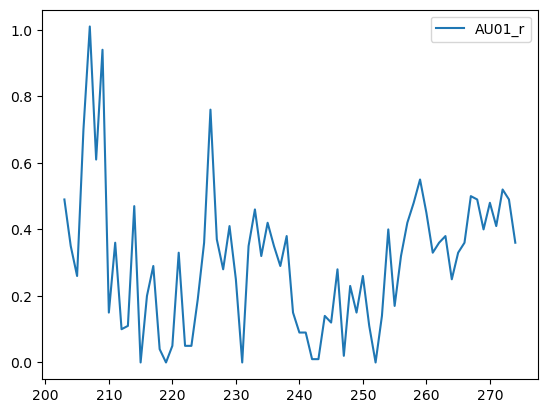

In [11]:
au = df[df['face_id'] == 1]['AU01_r']
pd.DataFrame(au).plot()

<Axes: >

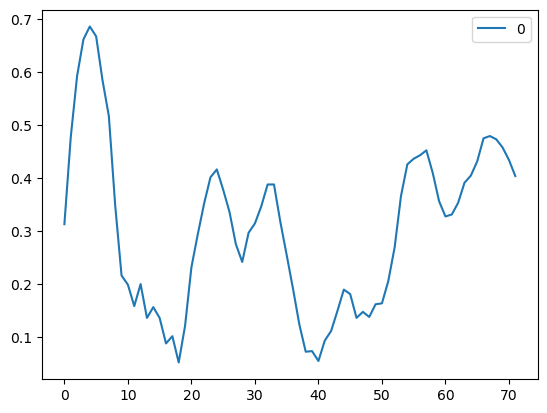

In [12]:
smoothed = savgol_filter(au, 11, 3)
pd.DataFrame(smoothed).plot()

Best window size: 71


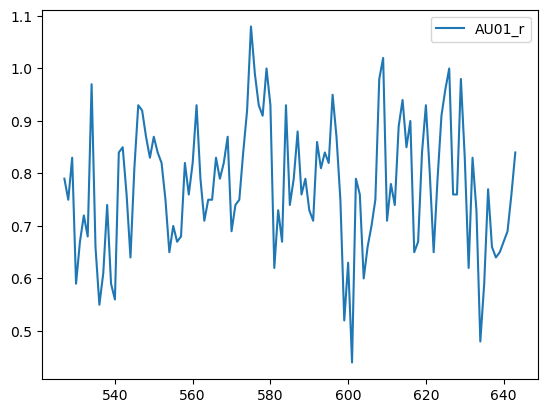

In [52]:
au = df[df['face_id'] == 5]['AU01_r']
pd.DataFrame(au).plot()

wsize = 5
results = []
while wsize < len(au):
    smoothed = savgol_filter(au, wsize, 2)
    signal = np.mean(au ** 2)
    noise = np.mean((au - smoothed) ** 2)
    snr = 10 * np.log10(signal / noise)
    results.append((wsize, snr))

    wsize += 6


best_window_size = min(results, key=lambda x: x[1])[0]
print(f"Best window size: {best_window_size}")



<Axes: >

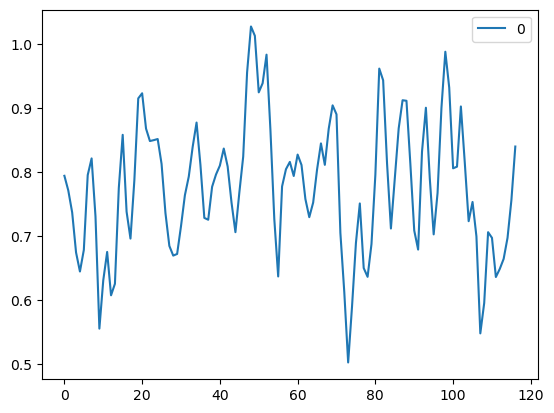

In [60]:
smoothed = savgol_filter(au, 5, 2)
pd.DataFrame(smoothed).plot()

<Axes: >

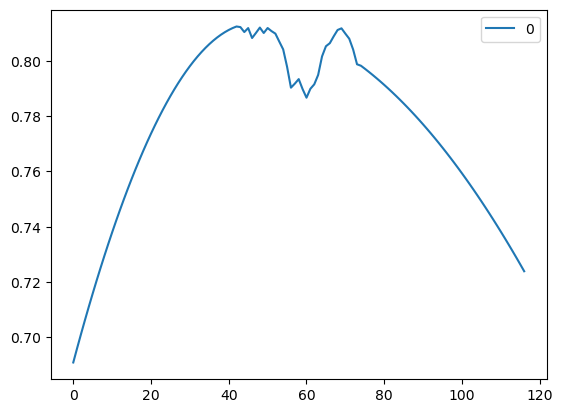

In [58]:
smoothed = savgol_filter(au, (3 * len(au)) // 4 - 1, 2)
pd.DataFrame(smoothed).plot()

<Axes: >

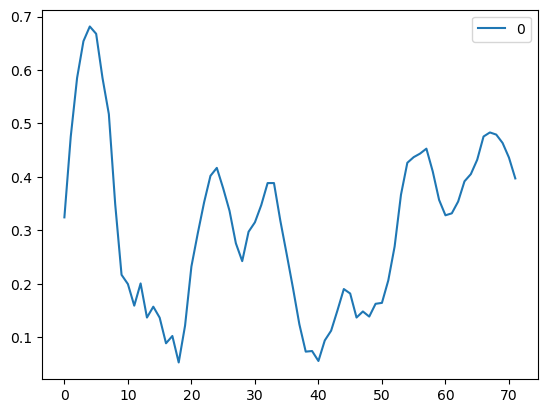

In [38]:
smoothed = savgol_filter(au, 11, 2)
pd.DataFrame(smoothed).plot()

<Axes: >

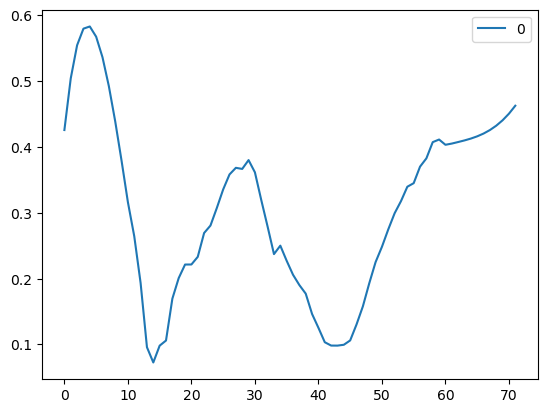

In [13]:
smoothed = savgol_filter(au, 21, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

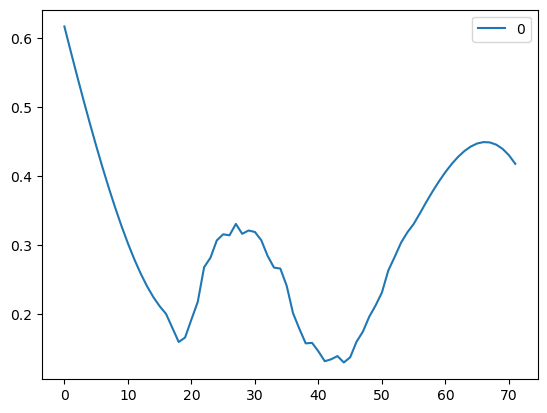

In [14]:
smoothed = savgol_filter(au, 31, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

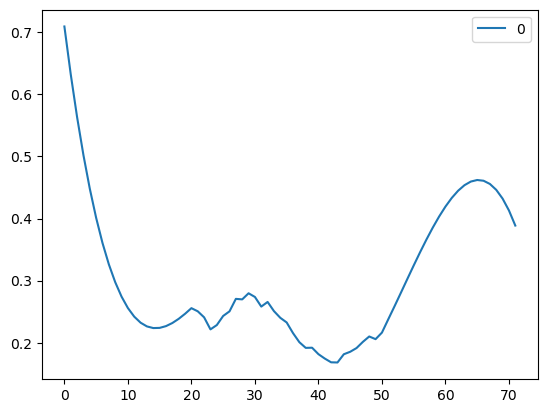

In [15]:
smoothed = savgol_filter(au, 41, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

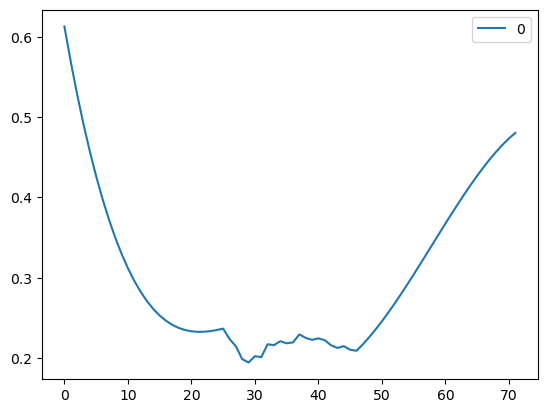

In [16]:
smoothed = savgol_filter(au, 51, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

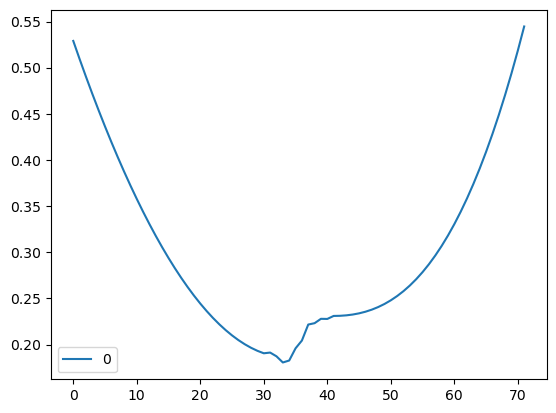

In [18]:
smoothed = savgol_filter(au, 61, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

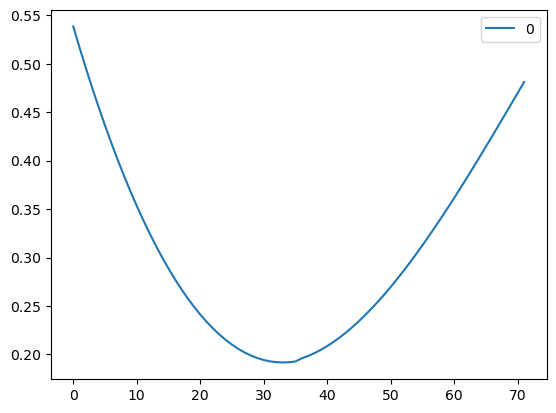

In [19]:
smoothed = savgol_filter(au, 71, 3)
pd.DataFrame(smoothed).plot()

In [341]:
#get statistical info of frames: calculating SUM of AU fields
def frames_info(df, name):
    i = 0
    temp = df.iloc[i]
    id_init = temp['face_id']
    id = 0
    frameN = 0
    frames_info = []
    while i < len(df)-1:
        id_init = id
        frame_len = 0
        frame_sum = 0
        
        #if temp['timestamp'] < 20:
            #continue
        while id == id_init and i < len(df)-1:
            frame_len += 1
            s = line_sum(temp, cols_of_interest)
            frame_sum += s
            #print(id, s)
            #get a new line
            i += 1
            temp = df.iloc[i]
            id = temp['face_id']
        #print('FRAME', frameN, 'SUM:', frame_len, frame_sum, frame_len*0.0415, frame_sum, frame_sum/frame_len)
        frames_info.append([frameN, frame_len, frame_sum, frame_len*0.0415, frame_sum/frame_len])
        frameN += 1
    
    if 'Quantum' in name:
        frames_info.pop(0)
        
    frames = pd.DataFrame(np.array(frames_info), columns=['face_id', 'frames_in_shot', 'AU_sum', 'frame_duration', 'AU_average'])
    print('ok')
    
    return frames

In [342]:
#calculate average by sum of AUs for each frame for each file

overall = []
movies = []
for i in filenames:
    name = i.split('_')[2].split('.')[0]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')
    frames = frames_info(df, name)
    print('ok calculating frames...')
    AU_mean = frames["AU_average"].mean()
    overall_time = frames['frame_duration'].sum()
    print(len(frames), overall_time, AU_mean)
    movies.append(frames)
    overall.append([name, len(frames), overall_time, AU_mean])


Prosess file SpiderAM ...
ok reading csv...
ok
ok calculating frames...
211 1217.7759999999998 6.566204155218703
Prosess file CleanAM ...
ok reading csv...
ok
ok calculating frames...
251 1662.5315 6.8301508399715045
Prosess file ClickHM ...
ok reading csv...
ok
ok calculating frames...
324 1568.866 7.165949823267254
Prosess file AllOrNothingAM ...
ok reading csv...
ok
ok calculating frames...
443 3851.9055 7.307668514002374
Prosess file CertifiedCopyAM ...
ok reading csv...
ok
ok calculating frames...
365 4380.823 6.689813140121054
Prosess file FastAndFuriousHM ...
ok reading csv...
ok
ok calculating frames...
183 813.6075000000001 6.5970200365420615
Prosess file BrightStarAM ...
ok reading csv...
ok
ok calculating frames...
266 1727.1885000000002 7.261528816079377
Prosess file SynecdocheAM ...
ok reading csv...
ok
ok calculating frames...
448 2807.4335 7.49023412725654
Prosess file MonsterInLawHM ...
ok reading csv...
ok
ok calculating frames...
280 1472.337 6.997067083419031
Prosess

In [343]:
#save all files separately
for i in range(len(filenames)):
    name = filenames[i].split('_')[2].split('.')[0]
    pd.DataFrame.from_dict(movies[i]).to_csv(f'./simple_stat_AU_c/{name}_AU_r.csv', sep=',', mode='w')
    

In [344]:
#add labels for each movie: HM for hollywood, AM for artistic
AM = 0
HM = 0
for i in overall:
    print(i)
    if 'HM' in i[0]:
        HM += i[-1]
    else:
        AM += i[-1]

print(AM, HM)

['SpiderAM', 211, 1217.7759999999998, 6.566204155218703]
['CleanAM', 251, 1662.5315, 6.8301508399715045]
['ClickHM', 324, 1568.866, 7.165949823267254]
['AllOrNothingAM', 443, 3851.9055, 7.307668514002374]
['CertifiedCopyAM', 365, 4380.823, 6.689813140121054]
['FastAndFuriousHM', 183, 813.6075000000001, 6.5970200365420615]
['BrightStarAM', 266, 1727.1885000000002, 7.261528816079377]
['SynecdocheAM', 448, 2807.4335, 7.49023412725654]
['MonsterInLawHM', 280, 1472.337, 6.997067083419031]
['PiratesOfCaribbeanHM', 286, 1532.595, 7.414194532136996]
['TheDarkKnightHM', 338, 1674.691, 7.51179997450836]
['QuantumOfSolaceHM', 163, 702.6780000000001, 6.3583310138712985]
42.14559959264955 42.044362463745


In [345]:
#save averall statistical info
movies_output = pd.DataFrame(np.array(overall), columns=['movie', 'suitable_shoots', 'time', 'AU_average'])
pd.DataFrame.from_dict(movies_output).to_csv(f'./simple_stat_AU_c/AU_c_mean.csv', sep=',', mode='w')

In [ ]:
################################
#######save data in a different format

In [441]:
def coun_frames(df, cols, name):
    print('Data frame length:', len(df))
    shots_len = []
    shots = []
    i = int(df.iloc[0]['face_id']) #first id
    print(i)
    last_id = df.iloc[len(df)-1]['face_id']
    print(last_id)
    fname = name[:-2]

    while i <= int(last_id):
        shots_len.append(len(df[df["face_id"] == i]))
        #print(shots_len[i])
        shot = list(range(1, shots_len[i]+1)) #array from 1 to shots_len[i]
        shots += shot
        i += 1
    #print(shot)


    #print(shots)
    df['success'] = shots
    df['frame'] = fname
    #df = df.rename(columns={"success": "frame"})
    df = df[['frame', 'face_id', 'success'] + cols]
    df = df.rename(columns={"frame": "title"})

    if 'Quantum' in name:
        df = df[df["face_id"] != 0]

    return df


In [435]:
#calculate mean by every AU column for each file

FOLD = './12movies_shots' #create a new folder (rewrite!)
new_folder(FOLD)

header = True

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    fnames_short.append(name)
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')


    temp_dset = coun_frames(df, cols_of_interest, name)
    temp_dset = temp_dset.rename(columns={"face_id": "shot", "success": "frame"})

    pd.DataFrame.from_dict(temp_dset).to_csv(f'./{FOLD}/{name}.csv', sep=',', header, mode='w')

    if header:
        header = False

Prosess file SpiderAM ...
ok reading csv...
Data frame length: 29345
0
210.0
Prosess file CleanAM ...
ok reading csv...
Data frame length: 40062
0
250.0
Prosess file ClickHM ...
ok reading csv...
Data frame length: 37805
0
323.0
Prosess file AllOrNothingAM ...
ok reading csv...
Data frame length: 92818
0
442.0
Prosess file CertifiedCopyAM ...
ok reading csv...
Data frame length: 105563
0
364.0
Prosess file FastAndFuriousHM ...
ok reading csv...
Data frame length: 19606
0
182.0
Prosess file BrightStarAM ...
ok reading csv...
Data frame length: 41620
0
265.0
Prosess file SynecdocheAM ...
ok reading csv...
Data frame length: 67650
0
447.0
Prosess file MonsterInLawHM ...
ok reading csv...
Data frame length: 35479
0
279.0
Prosess file PiratesOfCaribbeanHM ...
ok reading csv...
Data frame length: 36931
0
285.0
Prosess file TheDarkKnightHM ...
ok reading csv...
Data frame length: 40355
0
337.0
Prosess file QuantumOfSolaceHM ...
ok reading csv...
Data frame length: 17136
0
163.0


In [444]:
#calculate mean by every AU column for each file

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    fnames_short.append(name)
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')


    temp_dset = coun_frames(df, cols_of_interest, name)
    temp_dset = temp_dset.rename(columns={"face_id": "shot", "success": "frame"})
    
    pd.DataFrame.from_dict(temp_dset).to_csv(f'./{FOLD}/12movies_shots.csv', sep=',', mode='a', index=False)

Prosess file SpiderAM ...
ok reading csv...
Data frame length: 29345
0
210.0
Prosess file CleanAM ...
ok reading csv...
Data frame length: 40062
0
250.0
Prosess file ClickHM ...
ok reading csv...
Data frame length: 37805
0
323.0
Prosess file AllOrNothingAM ...
ok reading csv...
Data frame length: 92818
0
442.0
Prosess file CertifiedCopyAM ...
ok reading csv...
Data frame length: 105563
0
364.0
Prosess file FastAndFuriousHM ...
ok reading csv...
Data frame length: 19606
0
182.0
Prosess file BrightStarAM ...
ok reading csv...
Data frame length: 41620
0
265.0
Prosess file SynecdocheAM ...
ok reading csv...
Data frame length: 67650
0
447.0
Prosess file MonsterInLawHM ...
ok reading csv...
Data frame length: 35479
0
279.0
Prosess file PiratesOfCaribbeanHM ...
ok reading csv...
Data frame length: 36931
0
285.0
Prosess file TheDarkKnightHM ...
ok reading csv...
Data frame length: 40355
0
337.0
Prosess file QuantumOfSolaceHM ...
ok reading csv...
Data frame length: 17136
0
163.0


In [308]:
#calculate mean by every AU column
def mean_by_cols(df, name):
    last_frame = df.iloc[len(df)-1]['face_id']
    count = 0
    AU_mean = []

    for i in cols_of_interest:
        temp = list(df.groupby('face_id')[i].mean())
        AU_mean.append(temp)
    AU_mean = np.array(AU_mean).transpose()

    id = []
    for i in range(int(last_frame)+1):
        id.append(i)

    au_cols = ['face_id'] + cols_of_interest
    au = pd.DataFrame(np.array(AU_mean), columns=cols_of_interest)
    au['face_id'] = id

    if 'Quantum' in name:
        au = au.drop(au[au.face_id == 0].index)

    return au




In [315]:
#calculate mean by every AU column for each file

FOLD = './stat_AU_fields' #create a new folder (rewrite!)
new_folder(FOLD)
mean_AU_general = []
fnames_short = []

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    fnames_short.append(name)
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')
    au = mean_by_cols(df, name)

    temp = list(au[cols_of_interest].mean())
    temp.insert(0, name[-2:]) #add index: HM or AM
    temp.insert(0, name) #add a movie name
    mean_AU_general.append(temp)
    pd.DataFrame.from_dict(au).to_csv(f'./{FOLD}/{name}_AU_stat.csv', sep=',', mode='w')

    
    


Prosess file SpiderAM ...
ok reading csv...
Prosess file CleanAM ...
ok reading csv...
Prosess file ClickHM ...
ok reading csv...
Prosess file AllOrNothingAM ...
ok reading csv...
Prosess file CertifiedCopyAM ...
ok reading csv...
Prosess file FastAndFuriousHM ...
ok reading csv...
Prosess file BrightStarAM ...
ok reading csv...
Prosess file SynecdocheAM ...
ok reading csv...
Prosess file MonsterInLawHM ...
ok reading csv...
Prosess file PiratesOfCaribbeanHM ...
ok reading csv...
Prosess file TheDarkKnightHM ...
ok reading csv...
Prosess file QuantumOfSolaceHM ...
ok reading csv...


In [320]:
#calculate average for categories: HM and AM
au_mean = pd.DataFrame(np.array(mean_AU_general), columns=['movie', 'category']+cols_of_interest)

dataH = au_mean.loc[au_mean['category'] == 'HM'][cols_of_interest]
dataA = au_mean.loc[au_mean['category'] == 'AM'][cols_of_interest]
for i in cols_of_interest:
    dataH[i] = pd.to_numeric(dataH[i])
    dataA[i] = pd.to_numeric(dataA[i])
#print(dataH)
HM_mean = dataH[cols_of_interest].mean()
HM_mean['movie'] = 'Average'
HM_mean['category'] = 'HM'
AM_mean = dataA[cols_of_interest].mean()
AM_mean['category'] = 'AM'
AM_mean['movie'] = 'Average'

#append new lines: HM average and AM average
au_mean = au_mean.append(HM_mean, ignore_index=True)
au_mean = au_mean.append(AM_mean, ignore_index=True)

pd.DataFrame.from_dict(au_mean).to_csv(f'./{FOLD}/OVERALL_AU_stat_overall.csv', sep=',', mode='w')


/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_7165/4205811853.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  au_mean = au_mean.append(HM_mean, ignore_index=True)
/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_7165/4205811853.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  au_mean = au_mean.append(AM_mean, ignore_index=True)


In [321]:
au_mean

,movie,category,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,SpiderAM,AM,0.9493918438115928,0.3392046463944249,0.7388964895898026,0.6879994953243664,0.19488165389911563,0.3899918995156678,0.18479917396514484,0.7370492073577362,...,0.0994932250917507,0.39919724950081875,0.7163119292814921,0.32105057413033167,0.4286303439469457,0.15256050129896614,0.2441285376832852,0.28868719781483676,0.5824729052950394,0.2733872413299323
1,CleanAM,AM,0.9249637133050316,0.6303074522861439,0.5120793474201755,0.48061242474589105,0.28495490051139577,0.6185838451638274,0.4948771894142668,0.8367943378422472,...,0.15826328709929738,0.3073426305568563,0.6561176342735608,0.2948753969661658,0.5222243378952232,0.1729625535521118,0.302583601784915,0.3804760993076762,0.3260760477271473,0.44611256102043395
2,ClickHM,HM,1.0972805301997581,0.47956329986684376,0.7697691774316937,0.8431713104058923,0.24787219255283682,0.427461672592562,0.15847417232124344,0.7279263447491475,...,0.16336454982050597,0.35234624421824345,0.7085675323662397,0.2580480364968927,0.3163740601543729,0.1488817386449634,0.5575655953794018,0.5321380962975145,0.3826573695078289,0.4341648779623711
3,AllOrNothingAM,AM,1.241422955360487,0.4642208691966093,1.1762435456116642,0.7650205230690091,0.26295563727444293,0.4045492332346032,0.268216113024298,0.8559049380966958,...,0.07911663090583654,0.3008703328818338,0.7854350496144855,0.3793638282189969,0.4250626657427175,0.23625041480052983,0.37975270028566616,0.471571374921525,0.634981524931425,0.3771348028265536
4,CertifiedCopyAM,AM,0.6995450767904435,0.37820544251330435,0.7869501054672193,0.4578452528565954,0.31135698697461067,0.40848096184577887,0.295543831988432,0.7454294589038073,...,0.32759063896556656,0.46851795894712733,0.5738119022251601,0.26511694379330897,0.45392147131138383,0.2016187839807111,0.306764189210253,0.3236524164159487,0.40002902208366103,0.34457563677236436
5,FastAndFuriousHM,HM,0.8959664996817975,0.32826899476673915,1.099579340841498,0.6640046880328101,0.20777284295357623,0.24232459852002117,0.18202941241035997,0.786010035000466,...,0.06856319962918742,0.3207564517599316,0.6464419133422334,0.43524357806974356,0.35635162814012017,0.2739923126032854,0.26661956850994767,0.38394235228067947,0.5999636914435116,0.4744898381477765
6,BrightStarAM,AM,0.6558165747601751,0.06930764231813191,0.7044878641344975,0.3323119494557026,0.31887888976724715,0.3341458491731859,0.2992398002844632,0.43739980066114054,...,0.32790535515362657,0.6977662498260851,0.5395622870135031,0.4244403632616139,0.7457034656712759,0.22832045871627923,0.1730944777708274,0.13319893020410029,0.3186473289523891,0.308534454607931
7,SynecdocheAM,AM,0.6927534939739838,0.22983611565393217,1.0775610698227613,0.5705319132916263,0.6503424473195641,0.6519903856276764,0.5537315070180217,0.9475255982062587,...,0.2396803541772165,0.5090595281867802,0.7305906948431272,0.3606580439720812,0.49092840006491884,0.20912356909864593,0.3636220800707114,0.2797233402560955,0.4384922515785051,0.36615407908291503
8,MonsterInLawHM,HM,0.8997794875927605,0.5210315650783673,0.4030123763033676,0.6117773778083787,0.25002944763739293,0.31902055708752547,0.12207724333391184,0.7255047028886049,...,0.3051663720912375,0.4167035150398028,0.6094809530098684,0.23254460007540279,0.33386710289005683,0.10935270968485117,0.41593887608846525,0.4289052888677297,0.3442102336205472,0.41658765201035497
9,PiratesOfCaribbeanHM,HM,1.0437308554450235,0.3903182360980923,0.7115987834004266,0.7774772690912616,0.39131594655981916,0.4218735496471165,0.36625632169768885,0.7971260562629384,...,0.11248034391636581,0.2999539800763517,0.7366146593077147,0.4596925046080889,0.37875325781915964,0.27747570891261997,0.38336225527552814,0.4182949293053311,0.613333762222439,0.2830285833063852


In [660]:
au1 = df[df['face_id'] == 1]['AU01_r']
pd.DataFrame(au1[:100]).plot()

yhat = savgol_filter(au1, 23, 3)
pd.DataFrame(yhat).plot()


<AxesSubplot:>

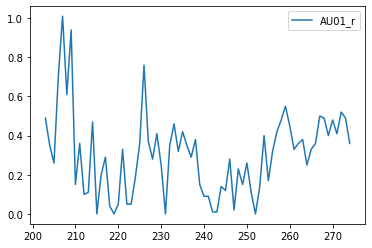

In [661]:
pd.DataFrame(au1).plot()

<AxesSubplot:>

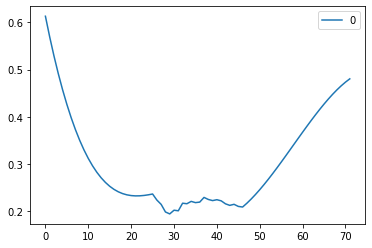

In [662]:
from scipy.signal import savgol_filter
yhat = savgol_filter(au1, 51, 3)
pd.DataFrame(yhat).plot()

In [663]:
print(yhat, au1)

[0.61276786 0.56897772 0.52858265 0.49145233 0.45745642 0.42646459
 0.39834648 0.37297177 0.35021012 0.32993119 0.31200465 0.29630015
 0.28268735 0.27103593 0.26121555 0.25309586 0.24654653 0.24143722
 0.23763759 0.23501731 0.23344604 0.23279344 0.23292918 0.23372291
 0.2350443  0.23676301 0.22395275 0.21482299 0.19877596 0.19465537
 0.20249541 0.20127364 0.21728737 0.21620626 0.22115088 0.21853972
 0.21967021 0.22956828 0.22523613 0.22283744 0.22469818 0.22234569
 0.21601305 0.21273528 0.21497565 0.21052164 0.20922241 0.21729138
 0.22615071 0.2357275  0.24594882 0.25674175 0.26803338 0.27975078
 0.29182104 0.30417124 0.31672846 0.32941978 0.34217229 0.35491307
 0.36756919 0.38006774 0.3923358  0.40430046 0.41588879 0.42702788
 0.4376448  0.44766665 0.45702049 0.46563342 0.47343251 0.48034485] 203    0.49
204    0.35
205    0.26
206    0.70
207    1.01
       ... 
270    0.48
271    0.41
272    0.52
273    0.49
274    0.36
Name: AU01_r, Length: 72, dtype: float64


<AxesSubplot:>

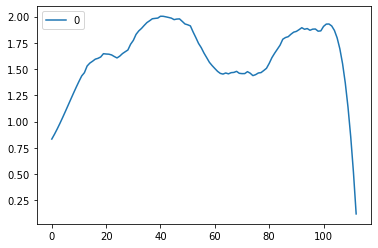

In [508]:
yhat = savgol_filter(au1, 23, 3)
pd.DataFrame(yhat).plot()

<AxesSubplot:>

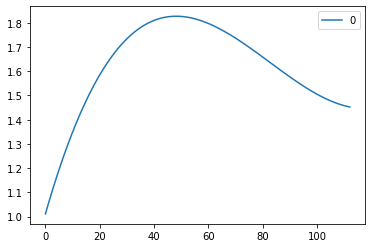

In [512]:
yhat = savgol_filter(au1, 113, 3)
pd.DataFrame(yhat).plot()

In [514]:
df['face_id'][29344]

210

In [515]:
au = []
for i in range(210):
    au.append(df[df['face_id'] == i]['AU01_r'])

In [521]:
'''for i in range(210):
    pd.DataFrame(au[i]).plot()
    yhat = savgol_filter(au[i], 53, 3)
    print('id = ', i)
    print(list(au[i][:50]))
    print(yhat[:50])
    pd.DataFrame(yhat).plot()'''

"for i in range(210):\n    pd.DataFrame(au[i]).plot()\n    yhat = savgol_filter(au[i], 53, 3)\n    print('id = ', i)\n    print(list(au[i][:50]))\n    print(yhat[:50])\n    pd.DataFrame(yhat).plot()"